In [2]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Necessary imports
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:.2f}'.format

import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

import patsy
import seaborn as sns
# from seaborn import plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import KFold
from sklearn.metrics import mean_squared_error
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import pylab
import random
import scipy.stats as stats
%matplotlib inline


/Users/matiasbeeck/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/matiasbeeck/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Loading in Scraped Data

In [3]:
# Loading in Final Dataset
df = pd.read_csv('project2_dataset.csv', keep_default_na=True)
df.head()#### Selecting Columns I'll Be Using

company_name                       industry  mat_paid_weeks  mat_unpaid_weeks  pat_paid_weeks  pat_unpaid_weeks                                   gd_overview_urls                                    gd_reviews_urls  gd_rating  gd_ceo_approval  gd_employee_reviews                             gd_overview_scrape_url     gd_headquarter              gd_co_size  gd_founded                             gd_industry                           gd_revenue                            gd_interview_scrape_url  gd_interview_pos_per  gd_interview_ntrl_per  gd_interview_neg_per  gd_interview_difficulty  industry_cat hq_population        hq_city hq_state  hq_pop_num                                    fb_url                                      linkedin_urls  employee_count    fb_likes        revenue  linkedin_followers  co_age
0                            Netflix  Technology: Consumer Internet              52                 0              52                 0  www.glassdoor.com/Overview/Working-at-Netflix-...  www.glassdoor.com/Reviews/Netflix-Reviews-E118...       3.70            86.00                  712  www.glassdoor.com/Overview/Working-at-Netflix-...      Los Gatos, CA  1001 to 5000 employees     1997.00                                Internet     $5 to $10 billion (USD) per year  https://www.glassdoor.com/Interview/Netflix-In...                    39                     26                    35                     2.90    Technology        30,545      Los Gatos       CA       30545          https://www.facebook.com/netflix           https://www.linkedin.com/company/netflix         3000.00  42,527,624  7500000000.00           558684.00   21.00
1  Bill and Melinda Gates Foundation                   Philanthropy              52                 0              52                 2  www.glassdoor.com/Overview/Working-at-Bill-and...  www.glassdoor.com/Reviews/Bill-and-Melinda-Gat...       3.40            87.00                  244  www.glassdoor.com/Overview/Working-at-Bill-and...        Seattle, WA  1001 to 5000 employees     1997.00                 Grantmaking Foundations  Less than $1 million (USD) per year  https://www.glassdoor.com/Interview/Bill-and-M...                    55                     27                    18                     3.00  Philanthropy       704,352        Seattle       WA      704352  https://www.facebook.com/gatesfoundation  https://www.linkedin.com/company/bill-&-melind...         3000.00   1,435,948      500000.00           288905.00   21.00
2                   Automattic, Inc.  Technology: Consumer Internet              32                 0               0                 0  www.glassdoor.com/Overview/Working-at-Automatt...  www.glassdoor.com/Reviews/Automattic-Reviews-E...       5.00           100.00                   20  www.glassdoor.com/Overview/Working-at-Automatt...  San Francisco, CA    201 to 500 employees     2005.00                                Internet     $5 to $10 million (USD) per year  https://www.glassdoor.com/Interview/Automattic...                    14                     29                    57                     3.60    Technology       870,887  San Francisco       CA      870887    https://www.facebook.com/AutomatticInc        https://www.linkedin.com/company/automattic          350.00      10,213     7500000.00            10606.00   13.00
3                         Ford Motor      Automotive: Manufacturers              30                 4               0                 0  www.glassdoor.com/Overview/Working-at-Ford-Mot...  www.glassdoor.com/Reviews/Ford-Motor-Company-R...       3.90            93.00                 2438  www.glassdoor.com/Overview/Working-at-Ford-Mot...       Dearborn, MI        10000+ employees     1903.00  Transportation Equipment Manufacturing          $10+ billion (USD) per year  https://www.glassdoor.com/Interview/Ford-Motor...                    72                     20                     8                     2.90    Automotive        94,444       Dearborn     

#### Selecting Columns I'll Be Using

In [4]:
company_data = df[['company_name', 'industry_cat', 'industry', 'gd_industry', 'mat_paid_weeks', 'mat_unpaid_weeks',
       'pat_paid_weeks', 'pat_unpaid_weeks',
       'gd_rating', 'gd_ceo_approval',
       'gd_employee_reviews', 'employee_count', 'co_age','revenue', 'linkedin_followers', 'gd_headquarter', 'hq_city',
       'hq_state', 'hq_pop_num',
       'gd_interview_pos_per',
       'gd_interview_ntrl_per', 'gd_interview_neg_per',
       'gd_interview_difficulty']]


In [5]:
# Renaming columns to be more readable, gd = glassdoor, fg = fairygodboss.com
company_data.columns = ['company_name', 'fg_industry_cat', 'fg_industry', 'gd_industry',
       'mat_paid_weeks', 'mat_unpaid_weeks', 'pat_paid_weeks',
       'pat_unpaid_weeks', 'gd_rating', 'gd_ceo_approval',
       'gd_employee_reviews_num', 'employee_num', 'co_age', 'revenue',
       'linkedin_followers', 'gd_hq', 'hq_city', 'hq_state',
       'hq_population', 'gd_interview_pos_per', 'gd_interview_ntrl_per',
       'gd_interview_neg_per', 'gd_interview_difficulty']

#### Dropping Nulls
Had cleaned the dataset in many other ways prior to loading in here, dropping the few remaining nulls
Most nulls came from revenue blanks. I could fill them with average revenue values of similar companies, but I am dropping them for now due to time constraints.

In [6]:
company_data_clean = company_data[~company_data.isnull().any(axis=1)]
company_data_clean.reset_index(drop=True)

company_name            fg_industry_cat                                  fg_industry                               gd_industry  mat_paid_weeks  mat_unpaid_weeks  pat_paid_weeks  pat_unpaid_weeks  gd_rating  gd_ceo_approval  gd_employee_reviews_num  employee_num  co_age        revenue  linkedin_followers                  gd_hq            hq_city hq_state  hq_population  gd_interview_pos_per  gd_interview_ntrl_per  gd_interview_neg_per  gd_interview_difficulty
0                                        Netflix                 Technology                Technology: Consumer Internet                                  Internet              52                 0              52                 0       3.70            86.00                      712       3000.00   21.00  7500000000.00           558684.00          Los Gatos, CA          Los Gatos       CA          30545                    39                     26                    35                     2.90
1              Bill and Melinda Gates Foundation               Philanthropy                                 Philanthropy                   Grantmaking Foundations              52                 0              52                 2       3.40            87.00                      244       3000.00   21.00      500000.00           288905.00            Seattle, WA            Seattle       WA         704352                    55                     27                    18                     3.00
2                               Automattic, Inc.                 Technology                Technology: Consumer Internet                                  Internet              32                 0               0                 0       5.00           100.00                       20        350.00   13.00     7500000.00            10606.00      San Francisco, CA      San Francisco       CA         870887                    14                     29                    57                     3.60
3                                     Ford Motor                 Automotive                    Automotive: Manufacturers    Transportation Equipment Manufacturing              30                 4               0                 0       3.90            93.00                     2438      10000.00  115.00 10000000000.00          1138618.00           Dearborn, MI           Dearborn       MI          94444                    72                     20                     8                     2.90
4                                           Etsy                 Technology                Technology: Consumer Internet                       Other Retail Stores              26                 0              26                 0       3.50            63.00                      106       3000.00   13.00    17500000.00                6.00           Brooklyn, NY           Brooklyn       NY        2630000                    43                     19                    38                     2.90
5                                  Adobe Systems                 Technology                         Technology: Software              Computer Hardware & Software              26                 6              10                 0       4.20            98.00                     2780      10000.00   36.00  7500000000.00           809096.00           San Jose, CA           San Jose       CA        1030000                    64                     16                    20                     3.10
6                        Morrison & Foerster LLP                   Law Firm                                     Law Firm                                     Legal              26                 0               0                 0       3.40            65.00                      163       3000.00  135.00  1500000000.00            20036.00      San Francisco, CA      San Francisco       CA         870887                    52                     34                    14                     2.90
7                                          Z

In [7]:
company_data_clean = company_data_clean.reset_index(drop=True)

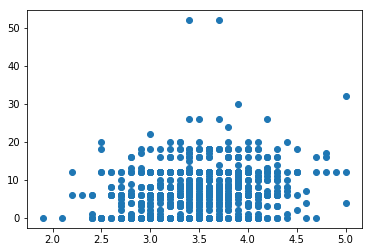

In [8]:
plt.scatter(company_data_clean.gd_rating, company_data_clean.mat_paid_weeks)

In [9]:
# Adding in new features, revenue per employee and linkedin followers per employee
company_data_clean['rev_per_emp'] = (company_data_clean.revenue/company_data_clean.employee_num)
company_data_clean['lifollowers_per_emp'] = (company_data_clean.linkedin_followers/company_data_clean.employee_num)
company_data_clean.head()

company_name fg_industry_cat                    fg_industry                             gd_industry  mat_paid_weeks  mat_unpaid_weeks  pat_paid_weeks  pat_unpaid_weeks  gd_rating  gd_ceo_approval  gd_employee_reviews_num  employee_num  co_age        revenue  linkedin_followers              gd_hq        hq_city hq_state  hq_population  gd_interview_pos_per  gd_interview_ntrl_per  gd_interview_neg_per  gd_interview_difficulty  rev_per_emp  lifollowers_per_emp
0                            Netflix      Technology  Technology: Consumer Internet                                Internet              52                 0              52                 0       3.70            86.00                      712       3000.00   21.00  7500000000.00           558684.00      Los Gatos, CA      Los Gatos       CA          30545                    39                     26                    35                     2.90   2500000.00               186.23
1  Bill and Melinda Gates Foundation    Philanthropy                   Philanthropy                 Grantmaking Foundations              52                 0              52                 2       3.40            87.00                      244       3000.00   21.00      500000.00           288905.00        Seattle, WA        Seattle       WA         704352                    55                     27                    18                     3.00       166.67                96.30
2                   Automattic, Inc.      Technology  Technology: Consumer Internet                                Internet              32                 0               0                 0       5.00           100.00                       20        350.00   13.00     7500000.00            10606.00  San Francisco, CA  San Francisco       CA         870887                    14                     29                    57                     3.60     21428.57                30.30
3                         Ford Motor      Automotive      Automotive: Manufacturers  Transportation Equipment Manufacturing              30                 4               0                 0       3.90            93.00                     2438      10000.00  115.00 10000000000.00          1138618.00       Dearborn, MI       Dearborn       MI          94444                    72                     20                     8                     2.90   1000000.00               113.86
4                               Etsy      Technology  Technology: Consumer Internet                     Other Retail Stores              26                 0              26                 0       3.50            63.00                      106       3000.00   13.00    17500000.00                6.00       Brooklyn, NY       Brooklyn       NY        2630000                    43                     19                    38                     2.90      5833.33                 0.00

## Linear Regression Prep:

#### Correlation Between Variables

In [10]:
company_data_clean.corr()['gd_rating'].sort_values(ascending=False)

gd_rating                  1.00
gd_ceo_approval            0.69
gd_interview_pos_per       0.26
gd_interview_difficulty    0.26
mat_paid_weeks             0.21
linkedin_followers         0.15
pat_paid_weeks             0.12
co_age                     0.07
pat_unpaid_weeks           0.06
lifollowers_per_emp        0.05
rev_per_emp               -0.02
gd_employee_reviews_num   -0.02
hq_population             -0.03
revenue                   -0.06
mat_unpaid_weeks          -0.07
employee_num              -0.10
gd_interview_neg_per      -0.17
gd_interview_ntrl_per     -0.18
Name: gd_rating, dtype: float64

Text(0.5,1,'Correlation Plot For Variables')

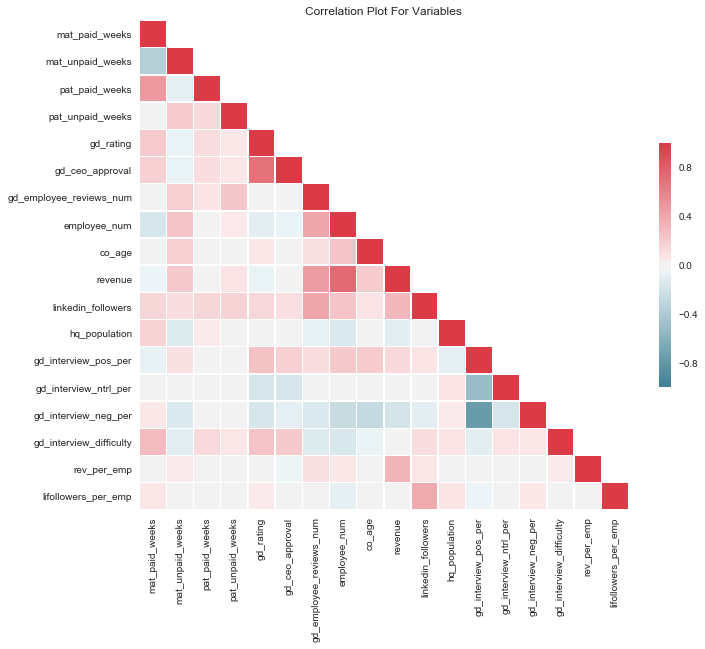

In [14]:
# Visualizing Correlations
sns.set(style="white")
corr_matrix = company_data_clean.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask, k=1)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns_heat = sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmin=-1,vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
figure = sns_heat.get_figure()
plt.title("Correlation Plot For Variables")


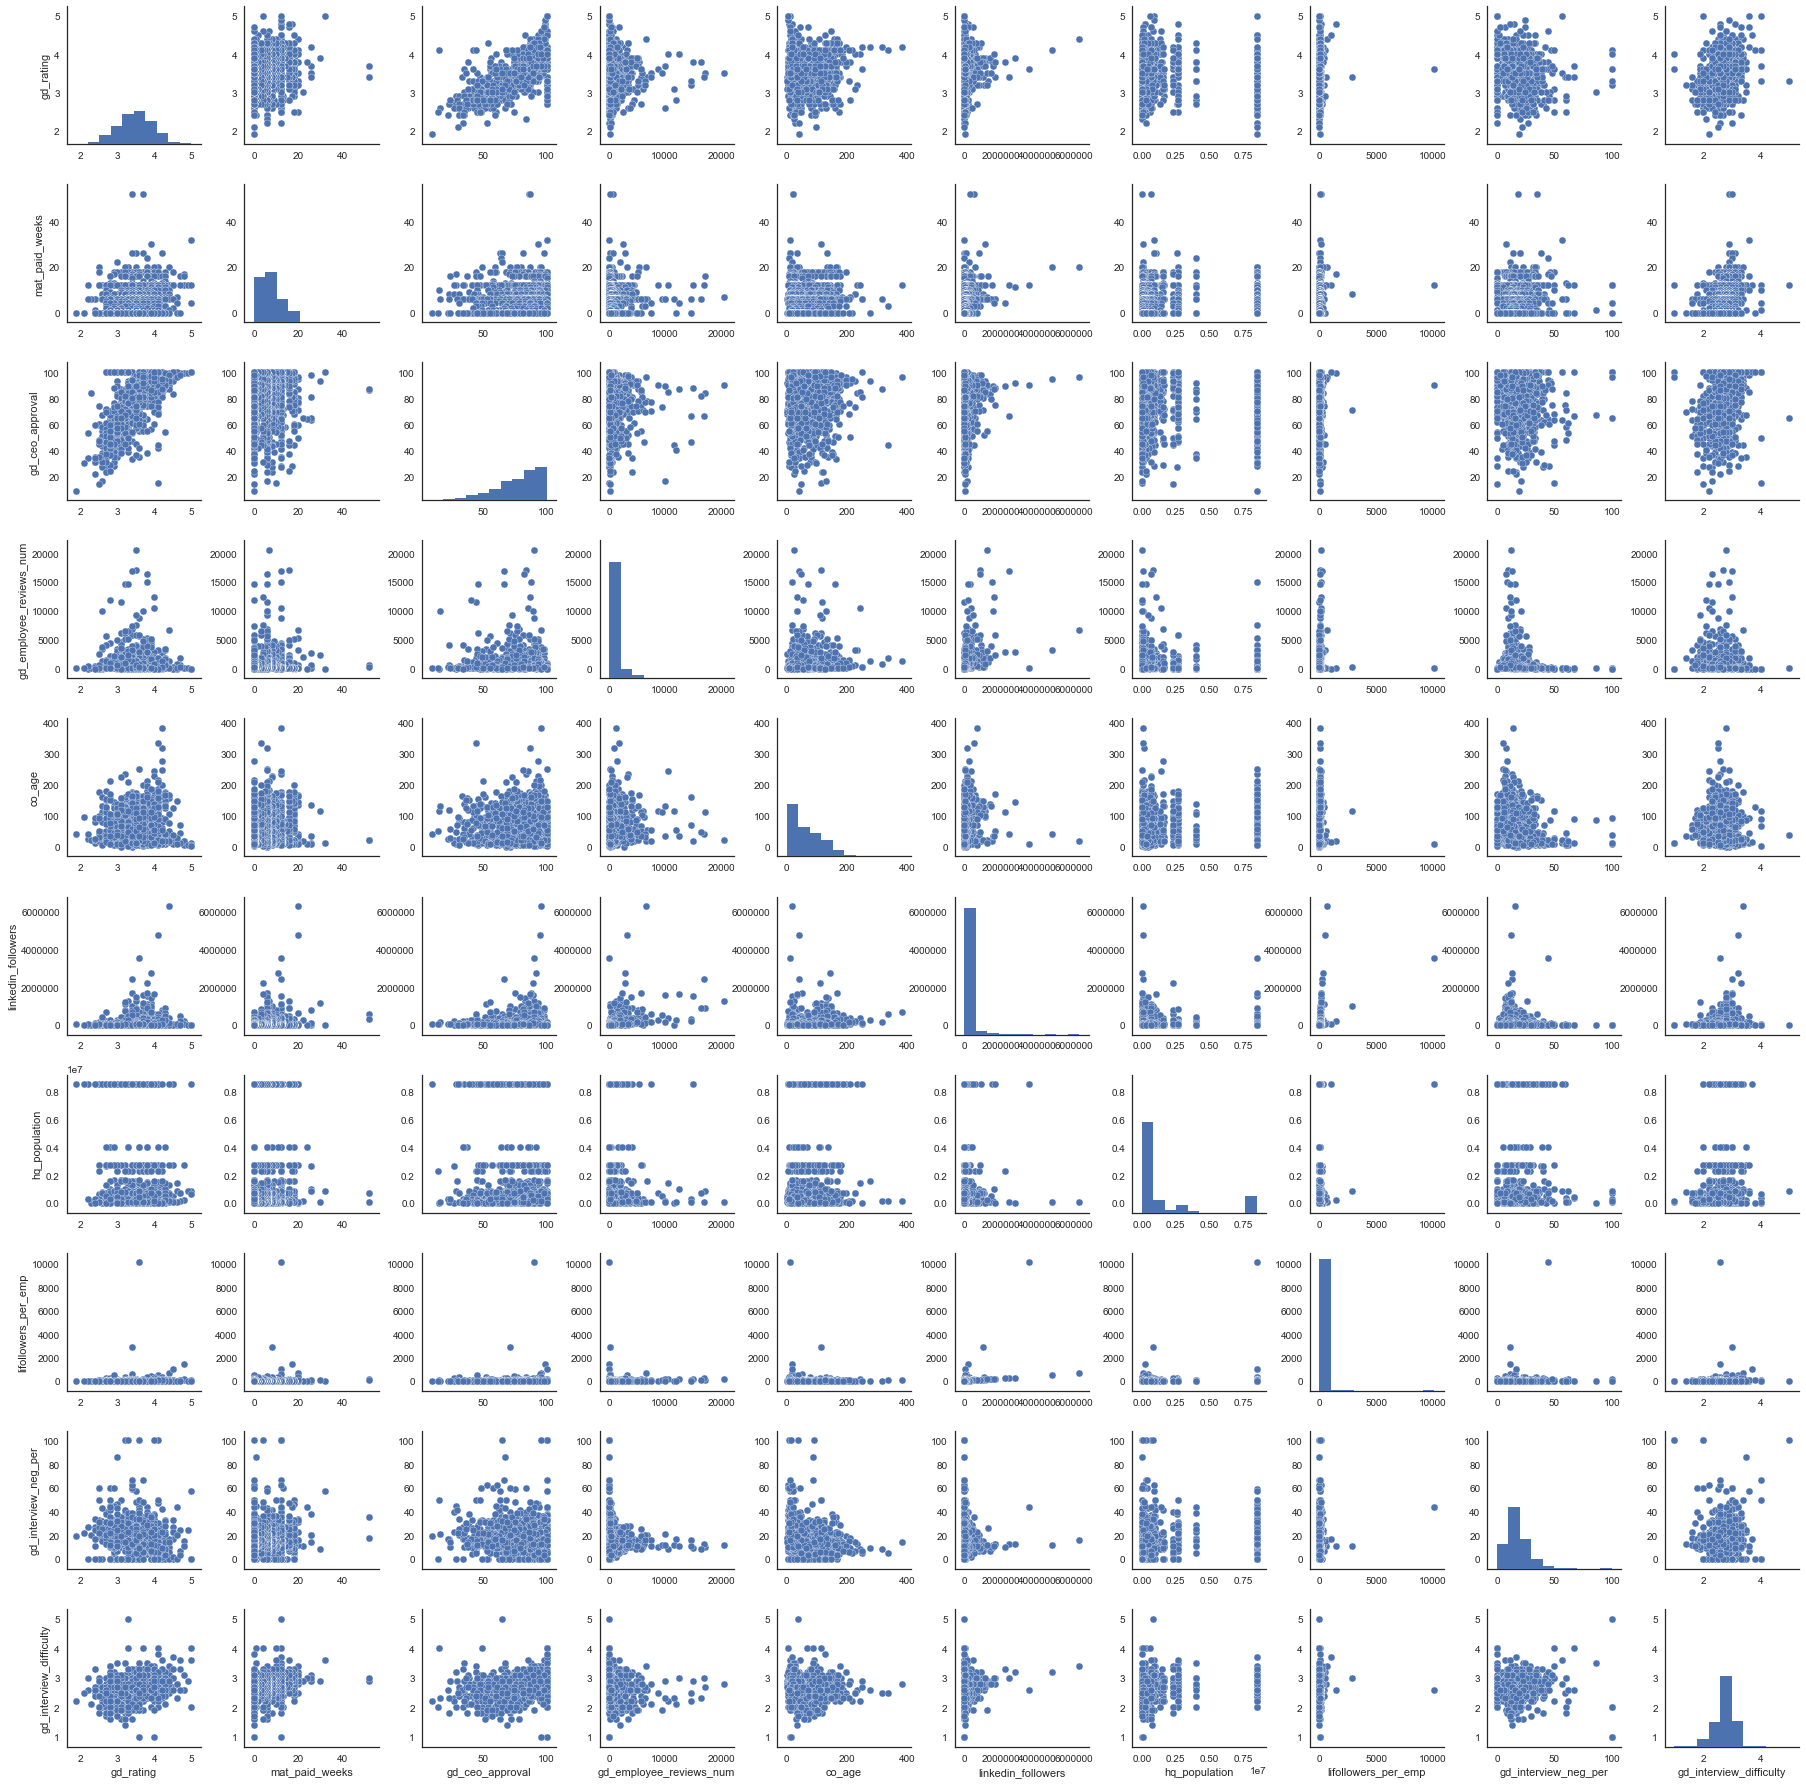

In [11]:
sns.pairplot(company_data_clean[['gd_rating','mat_paid_weeks', 'gd_ceo_approval',\
                                 'gd_employee_reviews_num', 'co_age',\
                                 'linkedin_followers', 'hq_population', 'lifollowers_per_emp',\
                                 'gd_interview_neg_per', 'gd_interview_difficulty',]])

### Histograms Of Possible Independent Variables

Both linkedin followers and my new linkedin followers per employee variable were not normally distributed, so I log transformed them both to test against them later

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1156cd7f0>]], dtype=object)

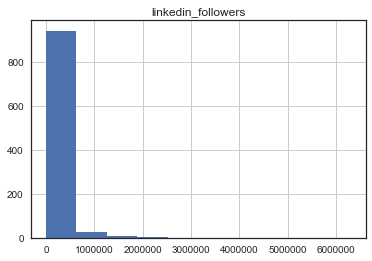

In [12]:
# Linkedin Followers
company_data_clean.hist(column='linkedin_followers')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2164b6d8>]], dtype=object)

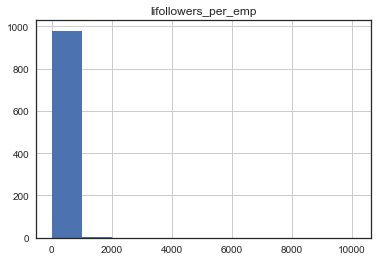

In [13]:
# Linkedin Followers scaled by size of company (Per Employee)
company_data_clean.hist(column='lifollowers_per_emp')

/Users/matiasbeeck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/Users/matiasbeeck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c22505a58>]], dtype=object)

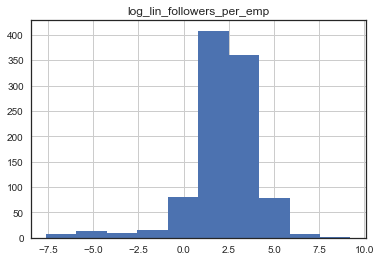

In [14]:
# Log of Linkedin Followers
company_data_clean['log_linkedin_followers'] = [np.log(elem) for elem in company_data_clean.linkedin_followers]
# Log of Linkedin Followers per emp
company_data_clean['log_lin_followers_per_emp'] = [np.log(elem) for elem in company_data_clean.lifollowers_per_emp]


# Cleaning it for erred values from log transformation
company_data_clean = company_data_clean[~company_data_clean.isin([np.nan, np.inf, -np.inf]).any(1)]

# Graphing Log linkedin distribution 
company_data_clean.hist(column='log_lin_followers_per_emp')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2176f978>]], dtype=object)

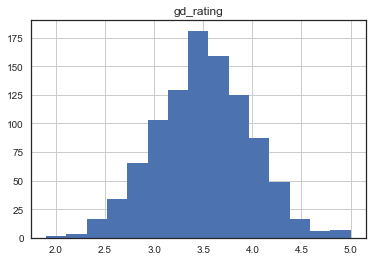

In [15]:
# GlassDoor Company Rating
# blue is gd_rating
company_data_clean.hist(column='gd_rating', bins=15)
# green is log of gd_rating
# np.log(company_data_clean.gd_rating).hist(bins=15)

In [16]:
# Storing log of gd_rating
company_data_clean['log_gd_rating'] = [np.log(elem) for elem in company_data_clean.gd_rating]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c216d7898>]], dtype=object)

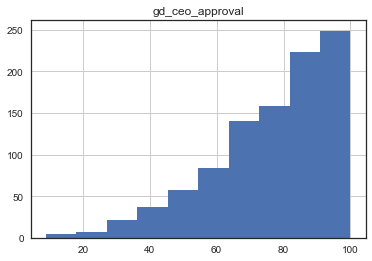

In [17]:
# CEO Approval Rating
company_data_clean.hist(column='gd_ceo_approval')
# np.log(company_data_clean.gd_ceo_approval).hist()

### Categorical Variables: Converting To Dummies
Categorical Variables:
* Industry
* Employee Num (Categorize into small medium large)


In [18]:
# Revenue Categorizing?
# revenue_buckets = pd.DataFrame(company_data_clean.revenue.value_counts()).reset_index()
# revenue_buckets.sort_values(by='index', ascending=False)

#### Industry Categorizing

Some industry categories had very few observations, so I chose to lump some together and make and "Other" category for the more random categories

In [19]:
company_data_clean.fg_industry_cat.value_counts()

Technology                   133
Healthcare                    83
Educational Services          74
Finance                       73
Retail                        72
Law Firm                      66
Nonprofit                     45
Industrial                    45
Natural Resources             43
Insurance                     35
Media                         33
Consumer Packaged Goods       29
Advertising                   25
Hospitality                   24
Consulting Services           23
Pharmaceutical                21
Business Services             20
Transportation                18
Information Services          16
Government                    11
Telecommunications            10
Real Estate                   10
Accounting Services            9
Automotive                     8
Electronics                    7
Publishing                     7
Aerospace                      6
Conglomerate                   5
Cosmetics                      5
Arts & Entertainment           4
Pharmacies

In [20]:
# Fields I'm compiling into "Other" field
other_fields = ["Automotive","Publishing","Electronics","Aerospace","Cosmetics","Arts & Entertainment",\
"Arts & Entertainment","Defense & Space","Maritime","Leisure, Travel & Tourism",\
"Textiles","Printing","Conglomerate", "Services"]

# Converting industry into less categories (bunching some together)
short_industry = []
for industry in company_data_clean.fg_industry_cat:
    if industry == "Accounting Services":
        short_industry.append("Finance")
    elif industry == "Packaging":
        short_industry.append("Consumer Packaged Goods")
    elif industry == "Public Relations":
        short_industry.append("Advertising")
    elif industry == "Philanthropy":
        short_industry.append("Nonprofit")
    elif industry == "Design":
        short_industry.append("Advertising")
    elif industry == "Pharmacies & Drug Stores":
        short_industry.append("Healthcare")
    elif industry in other_fields:
        short_industry.append("Other")
    else:
        short_industry.append(industry)
        
company_data_clean['industry_fin'] = short_industry
        

In [21]:
# Confirming new category counts
company_data_clean.industry_fin.value_counts()

Technology                 133
Healthcare                  87
Finance                     82
Educational Services        74
Retail                      72
Law Firm                    66
Other                       54
Nonprofit                   46
Industrial                  45
Natural Resources           43
Insurance                   35
Media                       33
Consumer Packaged Goods     31
Advertising                 28
Hospitality                 24
Consulting Services         23
Pharmaceutical              21
Business Services           20
Transportation              18
Information Services        16
Government                  11
Telecommunications          10
Real Estate                 10
Name: industry_fin, dtype: int64

In [22]:
# Creating dummies for industry categories
ind_cats_dummies = pd.get_dummies(company_data_clean['industry_fin'])
ind_cats_dummies.rename(columns = lambda x: "ind_" + x.replace(" ", "_").lower(), inplace = True)
company_data_clean = company_data_clean.join(ind_cats_dummies)
company_data_clean.head()

company_name fg_industry_cat                    fg_industry                             gd_industry  mat_paid_weeks  mat_unpaid_weeks  pat_paid_weeks  pat_unpaid_weeks  gd_rating  gd_ceo_approval  gd_employee_reviews_num  employee_num  co_age        revenue  linkedin_followers              gd_hq        hq_city hq_state  hq_population  gd_interview_pos_per  gd_interview_ntrl_per  gd_interview_neg_per  gd_interview_difficulty  rev_per_emp  lifollowers_per_emp  log_linkedin_followers  log_lin_followers_per_emp  log_gd_rating industry_fin  ind_advertising  ind_business_services  ind_consulting_services  ind_consumer_packaged_goods  ind_educational_services  ind_finance  ind_government  ind_healthcare  ind_hospitality  ind_industrial  ind_information_services  ind_insurance  ind_law_firm  ind_media  ind_natural_resources  ind_nonprofit  ind_other  ind_pharmaceutical  ind_real_estate  ind_retail  ind_technology  ind_telecommunications  ind_transportation
0                            Netflix      Technology  Technology: Consumer Internet                                Internet              52                 0              52                 0       3.70            86.00                      712       3000.00   21.00  7500000000.00           558684.00      Los Gatos, CA      Los Gatos       CA          30545                    39                     26                    35                     2.90   2500000.00               186.23                   13.23                       5.23           1.31   Technology                0                      0                        0                            0                         0            0               0               0                0               0                         0              0             0          0                      0              0          0                   0                0           0               1                       0                   0
1  Bill and Melinda Gates Foundation    Philanthropy                   Philanthropy                 Grantmaking Foundations              52                 0              52                 2       3.40            87.00                      244       3000.00   21.00      500000.00           288905.00        Seattle, WA        Seattle       WA         704352                    55                     27                    18                     3.00       166.67                96.30                   12.57                       4.57           1.22    Nonprofit                0                      0                        0                            0                         0            0               0               0                0               0                         0              0             0          0                      0              1          0                   0                0           0               0                       0                   0
2                   Automattic, Inc.      Technology  Technology: Consumer Internet                                Internet              32                 0               0                 0       5.00           100.00                       20        350.00   13.00     7500000.00            10606.00  San Francisco, CA  San Francisco       CA         870887                    14                     29                    57                     3.60     21428.57                30.30                    9.27                       3.41           1.61   Technology                0                      0                        0                            0                         0            0               0               0                0               0                         0              0             0          0                      0              0          0                   0                0           0               1                       0                   0
3                         Ford Motor      Automotive      Automotive: Manufa

#### Company Size (Employee Num) Categorizing


The "employee_num" variable was created by averaging out buckets of employee numbers from glassdoor (i.e. 1001 to 5000 employees was converted to 3000 employees). For this reason I will create a categorical variable for company size.

In [23]:
employee_buckets = pd.DataFrame(company_data_clean.employee_num.value_counts()).reset_index()
employee_buckets.sort_values(by='index', ascending=False)

index  employee_num
0 10000.00           409
2  7500.00           114
1  3000.00           252
3   750.00            80
4   350.00            70
5   126.00            50
6    26.00             7

Based on the above data I will bucket into three categories:
* Large = 10,000 employees (this includes any company with 10,000+ employees
* Medium = 3,000 or 7,500 employees (this includes any company within 1,001 to 10,000 employees)
* Small = Less than or equal to 750 employees

In [24]:
# Converting employee counts into categories 
company_sizes = []
for employees in company_data_clean.employee_num:
    if employees == 10000.0:
        company_sizes.append("large")
    elif (employees == 7500.0) | (employees == 3000.0):
        company_sizes.append("medium")
    else:
        company_sizes.append("small")

company_data_clean['co_size_cat'] = company_sizes        
pd.Series(company_sizes).value_counts().reset_index()

index    0
0   large  409
1  medium  366
2   small  207

In [25]:
# Creating Dummies for company size
size_cats_dummies = pd.get_dummies(company_data_clean['co_size_cat'])
size_cats_dummies.rename(columns = lambda x: "cosize_" + x.replace(" ", "_").lower(), inplace = True)
company_data_clean = company_data_clean.join(size_cats_dummies)
company_data_clean.head()

company_name fg_industry_cat                    fg_industry                             gd_industry  mat_paid_weeks  mat_unpaid_weeks  pat_paid_weeks  pat_unpaid_weeks  gd_rating  gd_ceo_approval  gd_employee_reviews_num  employee_num  co_age        revenue  linkedin_followers              gd_hq        hq_city hq_state  hq_population  gd_interview_pos_per  gd_interview_ntrl_per  gd_interview_neg_per  gd_interview_difficulty  rev_per_emp  lifollowers_per_emp  log_linkedin_followers  log_lin_followers_per_emp  log_gd_rating industry_fin  ind_advertising  ind_business_services  ind_consulting_services  ind_consumer_packaged_goods  ind_educational_services  ind_finance  ind_government  ind_healthcare  ind_hospitality  ind_industrial  ind_information_services  ind_insurance  ind_law_firm  ind_media  ind_natural_resources  ind_nonprofit  ind_other  ind_pharmaceutical  ind_real_estate  ind_retail  ind_technology  ind_telecommunications  ind_transportation  \
0                            Netflix      Technology  Technology: Consumer Internet                                Internet              52                 0              52                 0       3.70            86.00                      712       3000.00   21.00  7500000000.00           558684.00      Los Gatos, CA      Los Gatos       CA          30545                    39                     26                    35                     2.90   2500000.00               186.23                   13.23                       5.23           1.31   Technology                0                      0                        0                            0                         0            0               0               0                0               0                         0              0             0          0                      0              0          0                   0                0           0               1                       0                   0   
1  Bill and Melinda Gates Foundation    Philanthropy                   Philanthropy                 Grantmaking Foundations              52                 0              52                 2       3.40            87.00                      244       3000.00   21.00      500000.00           288905.00        Seattle, WA        Seattle       WA         704352                    55                     27                    18                     3.00       166.67                96.30                   12.57                       4.57           1.22    Nonprofit                0                      0                        0                            0                         0            0               0               0                0               0                         0              0             0          0                      0              1          0                   0                0           0               0                       0                   0   
2                   Automattic, Inc.      Technology  Technology: Consumer Internet                                Internet              32                 0               0                 0       5.00           100.00                       20        350.00   13.00     7500000.00            10606.00  San Francisco, CA  San Francisco       CA         870887                    14                     29                    57                     3.60     21428.57                30.30                    9.27                       3.41           1.61   Technology                0                      0                        0                            0                         0            0               0               0                0               0                         0              0             0          0                      0              0          0                   0                0           0               1                       0                   0   
3                         Ford Motor      Automotive      Automo

## Linear Regression Analysis
I will be predicting company "popularity" (log linkedin followers scaled by employee counts, using log as it is normally distributed ~seen above~)

In [26]:
# Definining OLS Regression function
def sm_ols_reg(indep_var,predictors,dataset):
    X = dataset[pred_columns]
    y = dataset[indep_var]
    df_data = dataset[[indep_var] + pred_columns]
    # Creating string of equation (predictors and indep variable)
    preds = " + ".join(predictors)
    equation = indep_var + ' ~ ' + preds
    # Create your model
    model = smf.ols(equation, data=dataset)
    # Fit your model to your training set
    # what is happening when we call fit?
    fit = model.fit()
    fit.resid.plot(style='o', figsize=(12,8));
    # Print summary statistics of the model's performance
    return df_data, X, y, fit, fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     log_lin_followers_per_emp   R-squared:                       0.200
Model:                                   OLS   Adj. R-squared:                  0.174
Method:                        Least Squares   F-statistic:                     7.662
Date:                       Fri, 26 Jan 2018   Prob (F-statistic):           1.88e-29
Time:                               10:57:13   Log-Likelihood:                -1903.7
No. Observations:                        982   AIC:                             3871.
Df Residuals:                            950   BIC:                             4028.
Df Model:                                 31                                         
Covariance Type:                   nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -1.0470      0.713     -1.469      0.142      -2.446       0.352
mat_paid_weeks                  0.0311      0.011      2.722      0.007       0.009       0.053
gd_ceo_approval                -0.0054      0.004     -1.207      0.228      -0.014       0.003
gd_employee_reviews_num         0.0002   3.36e-05      4.975      0.000       0.000       0.000
co_age                          0.0004      0.001      0.344      0.731      -0.002       0.003
gd_rating                       0.9461      0.182      5.191      0.000       0.588       1.304
hq_population                2.441e-08   2.11e-08      1.156      0.248    -1.7e-08    6.59e-08
gd_interview_pos_per           -0.0035      0.004     -0.813      0.416      -0.012       0.005
gd_interview_difficulty         0.5390      0.188      2.874      0.004       0.171       0.907
revenue                       3.81e-12   1.99e-11      0.191      0.849   -3.53e-11    4.29e-11
ind_business_services          -0.6046      0.509     -1.187      0.235      -1.604       0.395
ind_consulting_services        -1.1242      0.487     -2.309      0.021      -2.080      -0.169
ind_consumer_packaged_goods    -1.0041      0.462     -2.172      0.030      -1.911      -0.097
ind_educational_services       -0.8787      0.403     -2.178      0.030      -1.671      -0.087
ind_finance                    -1.5370      0.381     -4.030      0.000      -2.285      -0.789
ind_government                 -1.8102      0.620     -2.922      0.004      -3.026      -0.594
ind_healthcare                 -2.0690      0.380     -5.441      0.000      -2.815      -1.323
ind_hospitality                -1.6805      0.491     -3.422      0.001      -2.644      -0.717
ind_industrial                 -0.9914      0.426     -2.325      0.020      -1.828      -0.155
ind_information_services       -1.8119      0.538     -3.366      0.001      -2.868      -0.756
ind_insurance                  -1.7701      0.453     -3.904      0.000      -2.660      -0.880
ind_law_firm                   -2.4073      0.404     -5.963      0.000      -3.200      -1.615
ind_media                      -0.0646      0.444     -0.146      0.884      -0.936       0.806
ind_natural_resources          -1.1909      0.444     -2.682      0.007      -2.062      -0.320
ind_nonprofit                  -0.8887      0.415     -2.139      0.033      -1.704      -0.073
ind_other                      -1.0766      0.412     -2.612      0.009      -1.885      -0.268
ind_pharmaceutical             -1.3998      0.505     -2.771      0.006      -2.391      -0.408
ind_real_estate                -1.8658      0.633     -2.950      0.003      -3.107      -0.624
ind_retail                    

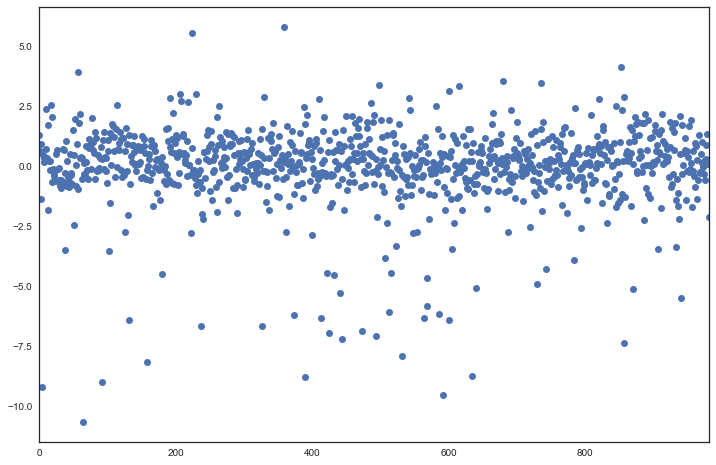

In [27]:
# Included everything aside from variables that were correlated
# i.e. employee number and company size (categorical) are related to my independent so I left them out
# revenue per employee and revenue are related, so I left in revenue
pred_columns =  ['mat_paid_weeks', 'gd_ceo_approval', 'gd_employee_reviews_num',\
                'co_age','gd_rating',\
                'hq_population', 'gd_interview_pos_per', 'gd_interview_difficulty',\
                'revenue','ind_business_services', 'ind_consulting_services',\
                'ind_consumer_packaged_goods', 'ind_educational_services',\
                'ind_finance', 'ind_government', 'ind_healthcare', 'ind_hospitality',\
                'ind_industrial', 'ind_information_services', 'ind_insurance',\
                'ind_law_firm', 'ind_media', 'ind_natural_resources', 'ind_nonprofit',\
                'ind_other', 'ind_pharmaceutical', 'ind_real_estate', 'ind_retail',\
                'ind_technology', 'ind_telecommunications', 'ind_transportation']
data_df, X, y, fit, fit_summary = sm_ols_reg('log_lin_followers_per_emp', pred_columns, company_data_clean)
fit_summary

Text(0.5,1,'Normal QQ Plot')

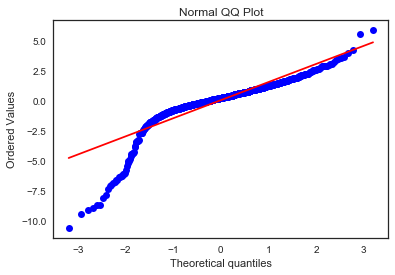

In [28]:
# QQ plot for kitchen sink model
stats.probplot(fit.resid, dist="norm", plot=plt)
plt.title("Normal QQ Plot")

The kitchen sink model (using all predictors, should yield highest R-squared, as it ignores multicollinearity) yielded a .174 (very weak) adjusted R-square thus predicting linkedin followers seems to be insignificant/difficult. I believe this can be attributed to the many biases associated with linkedin followers. Even though I removed the "size of company" bias by including the number of employees in the independent variable (linkedin followers/employee number), there are other biases such as industry and marketing/media dollars associated with driving more linkedin followers. I will pivot to predicting glassdoor ratings as I believe there are less biases there and that is a better representation of how people view a company, not just its social popularity.

## Linear Regression Analysis 2.0
I will be predicting company's glassdoor ratings since predicting linkedin followers was insignificant 

In [29]:
# Tried several interactions like the one below, but when run through regression, it only decreased the adjusted r-squared
company_data_clean['reviewnum_interview_pos'] = company_data_clean.gd_employee_reviews_num * company_data_clean.gd_interview_pos_per

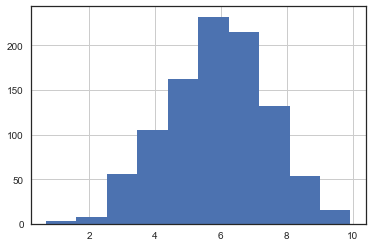

In [30]:
# Creating logs of all non-normally distributed predictor variables to test out effects on r squared
company_data_clean['log_co_age'] = np.log(company_data_clean.co_age)
company_data_clean['log_gd_ceo_approval'] = np.log(company_data_clean.gd_ceo_approval)
company_data_clean['log_employee_reviews'] = np.log(company_data_clean.gd_employee_reviews_num)
company_data_clean['log_mat_paid_weeks'] = np.log(company_data_clean.mat_paid_weeks + 1)
company_data_clean['log_revenue'] = np.log(company_data_clean.revenue)
company_data_clean['log_employee_num'] = np.log(company_data_clean.employee_num)

# Found out that log of employee reviews and log of linkedin followers improved r-squared slightly so I used those
company_data_clean['log_employee_reviews'].hist()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              gd_rating   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     45.15
Date:                Fri, 26 Jan 2018   Prob (F-statistic):          1.32e-169
Time:                        10:57:14   Log-Likelihood:                -187.81
No. Observations:                 982   AIC:                             443.6
Df Residuals:                     948   BIC:                             609.9
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.4603      0.142     10.255      0.000       1.181       1.740
mat_paid_weeks                  0.0091      0.002      4.570      0.000       0.005       0.013
gd_ceo_approval                 0.0155      0.001     26.367      0.000       0.014       0.017
log_employee_reviews           -0.0459      0.012     -3.923      0.000      -0.069      -0.023
co_age                          0.0003      0.000      1.169      0.243      -0.000       0.001
log_linkedin_followers          0.0264      0.006      4.440      0.000       0.015       0.038
hq_population               -3.123e-09    3.7e-09     -0.845      0.399   -1.04e-08    4.13e-09
gd_interview_pos_per            0.0049      0.001      6.472      0.000       0.003       0.006
gd_interview_difficulty         0.1322      0.033      4.053      0.000       0.068       0.196
revenue                      3.537e-12   4.47e-12      0.791      0.429   -5.23e-12    1.23e-11
ind_business_services           0.0153      0.089      0.172      0.864      -0.160       0.190
ind_consulting_services         0.1349      0.085      1.579      0.115      -0.033       0.303
ind_consumer_packaged_goods    -0.0407      0.082     -0.498      0.619      -0.201       0.120
ind_educational_services        0.4360      0.070      6.207      0.000       0.298       0.574
ind_finance                     0.0342      0.068      0.506      0.613      -0.099       0.167
ind_government                  0.2206      0.109      2.026      0.043       0.007       0.434
ind_healthcare                  0.0683      0.068      1.002      0.316      -0.065       0.202
ind_hospitality                 0.1814      0.087      2.079      0.038       0.010       0.353
ind_industrial                  0.0462      0.075      0.614      0.540      -0.101       0.194
ind_information_services        0.2016      0.095      2.129      0.034       0.016       0.387
ind_insurance                  -0.0710      0.080     -0.888      0.375      -0.228       0.086
ind_law_firm                   -0.1017      0.073     -1.393      0.164      -0.245       0.042
ind_media                       0.0161      0.078      0.207      0.836      -0.137       0.169
ind_natural_resources           0.0672      0.079      0.854      0.393      -0.087       0.222
ind_nonprofit                   0.0799      0.073      1.100      0.271      -0.063       0.222
ind_other                      -0.0339      0.073     -0.465      0.642      -0.177       0.109
ind_pharmaceutical              0.0329      0.089      0.370      0.711      -0.141       0.207
ind_real_estate                 0.0105      0.111      0.095      0.925      -0.208       0.229
ind_retail                      0.0783      0.070      1.116      0.265      -0.059       0.216
ind_technol

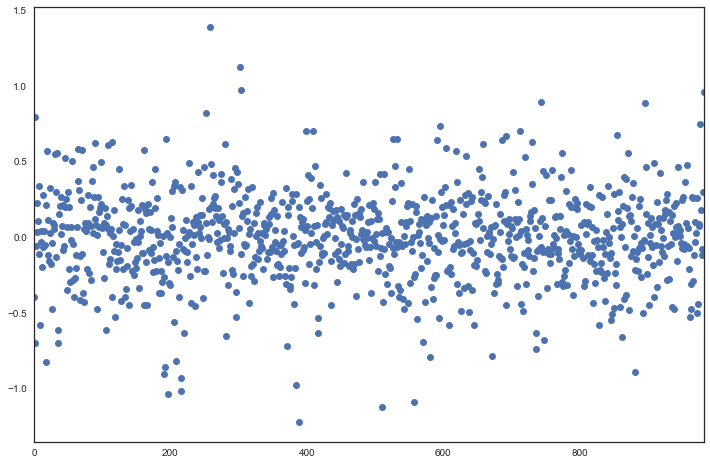

In [31]:
# Included everything aside from variables that were correlated
# i.e. employee number and company size (categorical) are related and same with
# revenue per employee and revenue, only kept revenue
pred_columns =  ['mat_paid_weeks', 'gd_ceo_approval', 'log_employee_reviews',\
                'co_age', 'log_linkedin_followers',\
                'hq_population', 'gd_interview_pos_per', 'gd_interview_difficulty',\
                'revenue','ind_business_services', 'ind_consulting_services',\
                'ind_consumer_packaged_goods', 'ind_educational_services',\
                'ind_finance', 'ind_government', 'ind_healthcare', 'ind_hospitality',\
                'ind_industrial', 'ind_information_services', 'ind_insurance',\
                'ind_law_firm', 'ind_media', 'ind_natural_resources', 'ind_nonprofit',\
                'ind_other', 'ind_pharmaceutical', 'ind_real_estate', 'ind_retail',\
                'ind_technology', 'ind_telecommunications', 'ind_transportation',\
                'cosize_medium', 'cosize_small']
data_df, X, y, fit, fit_summary = sm_ols_reg('gd_rating', pred_columns, company_data_clean)
fit_summary

Text(0.5,1,'Normal QQ Plot')

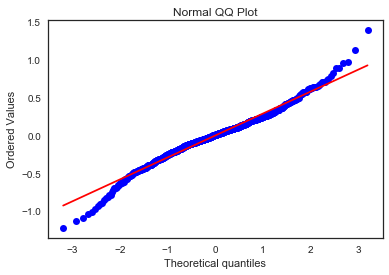

In [32]:
# QQ plot for kitchen sink model
stats.probplot(fit.resid, dist="norm", plot=plt)
plt.title("Normal QQ Plot")

Kitchen sink model for predicting Glassdoor Company ratings was much "better" (.588 adjusted R-squared) than my model predicting linkedin followers, however, my adjusted r-squared was still relatively low for having used all possible predictor variables. I tried to create interaction predictors like the one below and tried to tranform some of my predictors with log transformations, but nothing yielded improvements in the model.

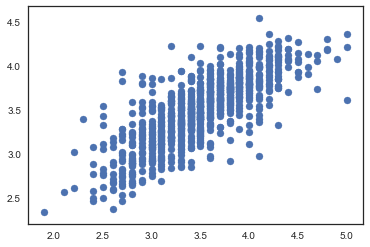

In [33]:
plt.scatter(y, fit.predict(X))

### Polynomial Analysis for Kitchen Sink GD Rating Prediction model

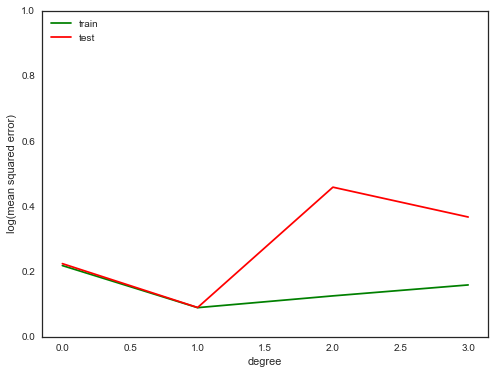

In [34]:
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# Step through degrees from 0 to 4 and store the training and test (generalization) error.
# create array of zeros,
train_error = np.empty(4)
test_error = np.empty(4)

for degree in range(4):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(X_train, y_train)
    train_error[degree] = mean_squared_error(y_train, est.predict(X_train))
    test_error[degree] = mean_squared_error(y_test, est.predict(X_test))

# Plot the training and test errors against degree
plt.figure(figsize=(8,6))
plt.plot(np.arange(4), train_error, color='green', label='train')
plt.plot(np.arange(4), test_error, color='red', label='test')
plt.ylim((0.0, 1e0))
plt.ylabel('log(mean squared error)')
plt.xlabel('degree')
plt.legend(loc='upper left')


In [35]:
# Fit for degree 2
degree = 2
est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
# Fitting model to training data
est.fit(X_train, y_train)
est.score(X, y)
# Score for 2 degrees was way lower than 1 degree, thus no reason to try polynomials

-0.17259985633804087

### Cross Validation (K-fold) for Kitchen Sink GD Rating Prediction model

In [36]:
# KFOLDS ON LINEAR REG, TRAIN TEST SPLIT (DOES MODEL PERFORM THE SAME WAY)
lr = LinearRegression()
lr.fit(X,y)
#Calculating cross validated score across 10 folds
kf=KFold(n=len(X),n_folds=10,shuffle=True)

all_scores=[]

# get indices of corresponding train & test
for train,test in kf:
    x_train=X.iloc[train]
    y_train=y.iloc[train]
    x_test=X.iloc[test]
    y_test=y.iloc[test]
    all_scores.append(lr.score(x_test,y_test))
    
np.mean(all_scores)

0.60354201677552743

### Lasso Regularization for Kitchen Sink GD Rating Prediction model

In [37]:
# first we normalize our features .. 
# normalize features to values between 0 and 1
data_df_trans=preprocessing.normalize(data_df,axis=0)

# turn back in DF
data_df_trans=pd.DataFrame(data_df_trans,columns=data_df.columns)

y_trans=data_df_trans['gd_rating']
X_trans=data_df_trans.drop('gd_rating',1)

X_trans.describe()

mat_paid_weeks  gd_ceo_approval  log_employee_reviews  co_age  log_linkedin_followers  hq_population  gd_interview_pos_per  gd_interview_difficulty  revenue  ind_business_services  ind_consulting_services  ind_consumer_packaged_goods  ind_educational_services  ind_finance  ind_government  ind_healthcare  ind_hospitality  ind_industrial  ind_information_services  ind_insurance  ind_law_firm  ind_media  ind_natural_resources  ind_nonprofit  ind_other  ind_pharmaceutical  ind_real_estate  ind_retail  ind_technology  ind_telecommunications  ind_transportation  cosize_medium  cosize_small
count          982.00           982.00                982.00  982.00                  982.00         982.00                982.00                   982.00   982.00                 982.00                   982.00                       982.00                    982.00       982.00          982.00          982.00           982.00          982.00                    982.00         982.00        982.00     982.00                 982.00         982.00     982.00              982.00           982.00      982.00          982.00                  982.00              982.00         982.00        982.00
mean             0.02             0.03                  0.03    0.03                    0.03           0.02                  0.03                     0.03     0.02                   0.00                     0.00                         0.01                      0.01         0.01            0.00            0.01             0.00            0.01                      0.00           0.01          0.01       0.01                   0.01           0.01       0.01                0.00             0.00        0.01            0.01                    0.00                0.00           0.02          0.01
std              0.02             0.01                  0.01    0.02                    0.01           0.03                  0.01                     0.00     0.02                   0.03                     0.03                         0.03                      0.03         0.03            0.03            0.03             0.03            0.03                      0.03           0.03          0.03       0.03                   0.03           0.03       0.03                0.03             0.03        0.03            0.03                    0.03                0.03           0.03          0.03
min              0.00             0.00                  0.00    0.00                    0.00           0.00                  0.00                     0.01     0.00                   0.00                     0.00                         0.00                      0.00         0.00            0.00            0.00             0.00            0.00                      0.00           0.00          0.00       0.00                   0.00           0.00       0.00                0.00             0.00        0.00            0.00                    0.00                0.00           0.00          0.00
25%              0.01             0.03                  0.03    0.01                    0.03           0.00                  0.03                     0.03     0.00                   0.00                     0.00                         0.00                      0.00         0.00            0.00            0.00             0.00            0.00                      0.00           0.00          0.00       0.00                   0.00           0.00       0.00                0.00             0.00        0.00            0.00                    0.00                0.00           0.00          0.00
50%              0.02             0.03                  0.03    0.02                    0.03           0.00                  0.03                     0.03     0.01                   0.00                     0.00                         0.00                      0.00         0.00            0.00            0.00             0.00            0.00                      0.00           0.00          0.00       0.00         

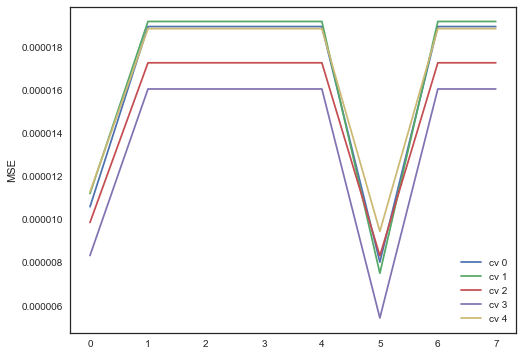

In [38]:
# A bit more involved approach: illustrated here with Lasso
# LASSO CROSS VAL
kf = KFold(len(X_trans),n_folds=5, shuffle=True)

all_scores=[]
alphas=[1e-5,1e-4,1e-3,1e-2,1e-1,0,1,100]


for train, test in kf:
    x_train=X_trans.iloc[train]
    y_train=y_trans.iloc[train]
    x_test=X_trans.iloc[test]
    y_test=y_trans.iloc[test]
    mse_score=[]
    r2=[]
    for a in alphas:
        est=Lasso(alpha=a,tol=0.001)
        est.fit(x_train,y_train)
        mse=np.mean((y_test-est.predict(x_test))**2)
        mse_score.append(mse)
        r2.append(est.score(x_test,y_test))
            
    all_scores.append(mse_score)
    
# Which alpha is the best for our model ? Looks like alpha= 0
plt.figure(figsize=(8,6))
#plt.ylim(0,0.1)
plt.legend()
for i in range(5):
    plt.plot(all_scores[i],label = 'cv %s'%i)
    
plt.legend()
plt.ylabel('MSE')
plt.show()

In [39]:
# Normalizing Data For Lasso
scaler = StandardScaler()
scaler_trans = scaler.fit_transform(X)
x_scaler_df=pd.DataFrame(scaler_trans,columns=X.columns)

scalery_trans = scaler.fit_transform(y.reshape(-1, 1))
y_scaler_df=pd.DataFrame(scalery_trans,columns=["gd_rating_trans"])
x_scaler_df.describe()

mat_paid_weeks  gd_ceo_approval  log_employee_reviews  co_age  log_linkedin_followers  hq_population  gd_interview_pos_per  gd_interview_difficulty  revenue  ind_business_services  ind_consulting_services  ind_consumer_packaged_goods  ind_educational_services  ind_finance  ind_government  ind_healthcare  ind_hospitality  ind_industrial  ind_information_services  ind_insurance  ind_law_firm  ind_media  ind_natural_resources  ind_nonprofit  ind_other  ind_pharmaceutical  ind_real_estate  ind_retail  ind_technology  ind_telecommunications  ind_transportation  cosize_medium  cosize_small
count          982.00           982.00                982.00  982.00                  982.00         982.00                982.00                   982.00   982.00                 982.00                   982.00                       982.00                    982.00       982.00          982.00          982.00           982.00          982.00                    982.00         982.00        982.00     982.00                 982.00         982.00     982.00              982.00           982.00      982.00          982.00                  982.00              982.00         982.00        982.00
mean             0.00            -0.00                  0.00   -0.00                    0.00          -0.00                 -0.00                     0.00     0.00                   0.00                     0.00                        -0.00                     -0.00        -0.00            0.00           -0.00             0.00            0.00                     -0.00          -0.00         -0.00       0.00                   0.00           0.00       0.00               -0.00             0.00        0.00           -0.00                    0.00                0.00          -0.00          0.00
std              1.00             1.00                  1.00    1.00                    1.00           1.00                  1.00                     1.00     1.00                   1.00                     1.00                         1.00                      1.00         1.00            1.00            1.00             1.00            1.00                      1.00           1.00          1.00       1.00                   1.00           1.00       1.00                1.00             1.00        1.00            1.00                    1.00                1.00           1.00          1.00
min             -1.17            -3.78                 -3.39   -1.27                   -4.98          -0.59                 -4.48                    -4.84    -0.94                  -0.14                    -0.15                        -0.18                     -0.29        -0.30           -0.11           -0.31            -0.16           -0.22                     -0.13          -0.19         -0.27      -0.19                  -0.21          -0.22      -0.24               -0.15            -0.10       -0.28           -0.40                   -0.10               -0.14          -0.77         -0.52
25%             -0.84            -0.60                 -0.72   -0.84                   -0.47          -0.56                 -0.51                    -0.58    -0.86                  -0.14                    -0.15                        -0.18                     -0.29        -0.30           -0.11           -0.31            -0.16           -0.22                     -0.13          -0.19         -0.27      -0.19                  -0.21          -0.22      -0.24               -0.15            -0.10       -0.28           -0.40                   -0.10               -0.14          -0.77         -0.52
50%             -0.16             0.24                  0.02   -0.29                    0.07          -0.44                  0.07                    -0.01    -0.56                  -0.14                    -0.15                        -0.18                     -0.29        -0.30           -0.11           -0.31            -0.16           -0.22                     -0.13          -0.19         -0.27      -0.19         

In [40]:
####Grid Search to find best alpha, intercept and features
def lassoCoef(x,y):
    alphas=[1e-5,1e-4,1e-3,1e-2,1e-1,0,1,100]
    # create and fit a Lasso regression model, testing each alpha
    model = Lasso()
    grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas), cv = 5)
    grid = grid.fit(x,y)
    #print(grid)
    # summarize the results of the grid search
    pred = grid.predict(x)
    score = grid.best_score_
    alpha = grid.best_estimator_.alpha
    intercept = grid.best_estimator_.intercept_
    #print(grid.best_estimator_.coef_)
    zipped = zip(x.columns, grid.best_estimator_.coef_)
    features = sorted(zipped, key = lambda t: t[1], reverse = True)
    return [score, alpha, intercept, features, pred]

score, alpha, intercept, features, pred = lassoCoef(x_scaler_df,y_scaler_df)
score, alpha, intercept, features

(0.55307370470555106,
 0.01,
 array([  5.65648356e-16]),
 [('gd_ceo_approval', 0.58886714292611253),
  ('ind_educational_services', 0.20858010581565894),
  ('gd_interview_pos_per', 0.13393685147488821),
  ('log_linkedin_followers', 0.097732048002456967),
  ('gd_interview_difficulty', 0.093335317108956109),
  ('mat_paid_weeks', 0.093305775512298114),
  ('ind_technology', 0.087701927432049354),
  ('cosize_small', 0.042805587922217017),
  ('ind_government', 0.028738987406393881),
  ('ind_information_services', 0.028060828206140687),
  ('ind_hospitality', 0.020668782184624215),
  ('ind_consulting_services', 0.015785530032765005),
  ('ind_transportation', 0.014145860939969222),
  ('co_age', 0.010100946574481306),
  ('ind_natural_resources', 0.0064663038636966087),
  ('ind_nonprofit', 0.0051850387700032863),
  ('revenue', 0.0),
  ('ind_finance', -0.0),
  ('ind_healthcare', 0.0),
  ('ind_industrial', 0.0),
  ('ind_pharmaceutical', -0.0),
  ('ind_real_estate', -0.0),
  ('ind_retail', 0.0),
  (

In [41]:
# Plotting Feature Importance
feature_df = pd.DataFrame(features, columns=['feature','abs_coefficient'])
feature_df.abs_coefficient = abs(feature_df.abs_coefficient)
feature_df.sort_values(by='abs_coefficient', ascending = False)

feature  abs_coefficient
0               gd_ceo_approval             0.59
1      ind_educational_services             0.21
2          gd_interview_pos_per             0.13
3        log_linkedin_followers             0.10
32         log_employee_reviews             0.10
4       gd_interview_difficulty             0.09
5                mat_paid_weeks             0.09
6                ind_technology             0.09
31                 ind_law_firm             0.06
7                  cosize_small             0.04
30                ind_insurance             0.04
29                    ind_other             0.03
8                ind_government             0.03
9      ind_information_services             0.03
10              ind_hospitality             0.02
28  ind_consumer_packaged_goods             0.02
27                cosize_medium             0.02
11      ind_consulting_services             0.02
12           ind_transportation             0.01
13                       co_age             0.01
26                hq_population             0.01
14        ind_natural_resources             0.01
15                ind_nonprofit             0.01
25        ind_business_services             0.00
24                    ind_media             0.00
23       ind_telecommunications             0.00
19               ind_industrial             0.00
22                   ind_retail             0.00
21              ind_real_estate             0.00
20           ind_pharmaceutical             0.00
18               ind_healthcare             0.00
17                  ind_finance             0.00
16                      revenue             0.00

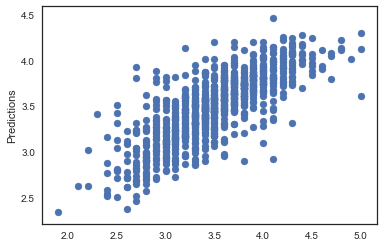

In [42]:
# company_data_clean['predictions'] = pred
# Have to untransform pred
plt.scatter(company_data_clean.gd_rating, scaler.inverse_transform(pred))
plt.ylabel('Predictions')
plt.show()

In [43]:
# # Take a quick look at our strongest features
# X_train, X_test, y_train, y_test = train_test_split(X_trans, y_trans, test_size=0.3)

# est=Lasso(alpha=0)
# est.fit(X_train,y_train)
# est.alpha


# zipped=zip(X.columns,est.coef_)
# features=sorted(zipped,key = lambda t: t[1],reverse=True)
# features

## Linear Regression (removing multicollinearity)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              gd_rating   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     147.8
Date:                Fri, 26 Jan 2018   Prob (F-statistic):          2.85e-162
Time:                        10:57:17   Log-Likelihood:                -261.08
No. Observations:                 982   AIC:                             540.2
Df Residuals:                     973   BIC:                             584.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   1.5964      0.123     12.980      0.000       1.355       1.838
mat_paid_weeks              0.0043      0.002      2.344      0.019       0.001       0.008
gd_ceo_approval             0.0159      0.001     26.398      0.000       0.015       0.017
co_age                      0.0004      0.000      2.092      0.037    2.62e-05       0.001
log_linkedin_followers      0.0342      0.006      5.916      0.000       0.023       0.046
gd_interview_pos_per        0.0056      0.001      7.045      0.000       0.004       0.007
gd_interview_difficulty     0.1391      0.031      4.476      0.000       0.078       0.200
revenue                  -6.81e-12   3.35e-12     -2.032      0.042   -1.34e-11   -2.34e-13
log_employee_num           -0.0524      0.010     -5.105      0.000      -0.073      -0.032
==============================================================================
Omnibus:                       53.281   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.508
Skew:                           0.065   Prob(JB):                     1.92e-41
Kurtosis:                       5.137   Cond. No.                     6.67e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.67e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

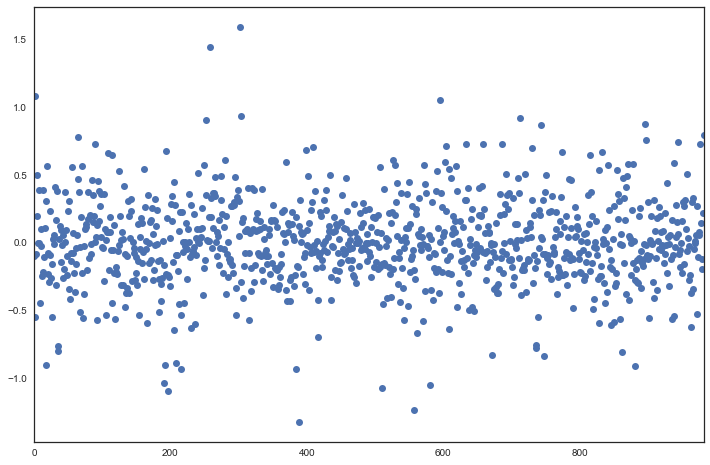

In [44]:
# Removed all categorical variables as they were not significant
# Re-added in employee count, but like categoricals for employees, however, log of employees was
# Employee review number was insignificant and thus removed
# HQ population also was statistically insignificant and added essentially nothing to R-squared thus removed
pred_columns =  ['mat_paid_weeks', 'gd_ceo_approval',\
                'co_age', 'log_linkedin_followers',\
                'gd_interview_pos_per', 'gd_interview_difficulty',\
                'revenue','log_employee_num']
data_df, X, y, fit, fit_summary = sm_ols_reg('gd_rating', pred_columns, company_data_clean)
fit_summary

Text(0.5,1,'Normal QQ Plot')

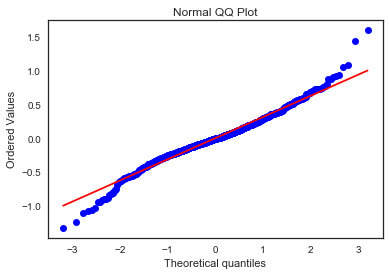

In [45]:
# QQ plot for kitchen sink model
stats.probplot(fit.resid, dist="norm", plot=plt)
plt.title("Normal QQ Plot")

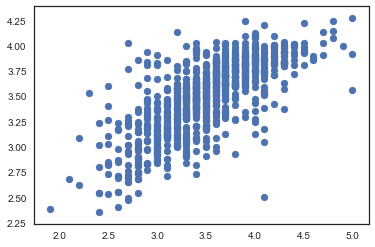

In [46]:
plt.scatter(y, fit.predict(X))

### Polynomial Analysis for Improved GD Rating Prediction model

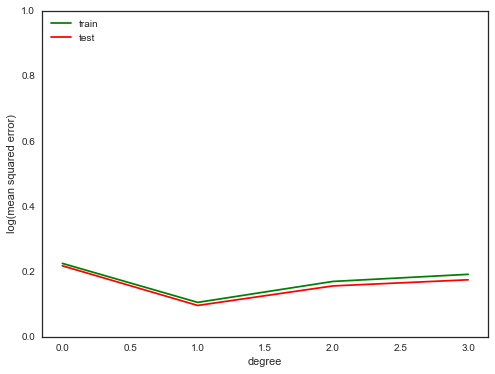

In [47]:
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# Step through degrees from 0 to 4 and store the training and test (generalization) error.
# create array of zeros,
train_error = np.empty(4)
test_error = np.empty(4)
for degree in range(4):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(X_train, y_train)
    train_error[degree] = mean_squared_error(y_train, est.predict(X_train))
    test_error[degree] = mean_squared_error(y_test, est.predict(X_test))

# Plot the training and test errors against degree
plt.figure(figsize=(8,6))
plt.plot(np.arange(4), train_error, color='green', label='train')
plt.plot(np.arange(4), test_error, color='red', label='test')
plt.ylim((0.0, 1e0))
plt.ylabel('log(mean squared error)')
plt.xlabel('degree')
plt.legend(loc='upper left')

In [48]:
# Fit for degree 2
degree = 2
est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
# Fitting model to training data
est.fit(X_train, y_train)
est.score(X, y)
# Score for 2 degrees was way lower than 1 degree, thus no reason to try polynomials

0.2621573738690709

### Cross Validation for Upgraded GD Rating Model

In [49]:
# KFOLDS ON LINEAR REG, TRAIN TEST SPLIT (DOES MODEL PERFORM THE SAME WAY)
lr = LinearRegression()
lr.fit(X,y)
#Calculating cross validated score across 5 folds
kf=KFold(n=len(X),n_folds=10,shuffle=True)

all_scores=[]

# get indices of corresponding train & test
for train,test in kf:
    x_train=X.iloc[train]
    y_train=y.iloc[train]
    x_test=X.iloc[test]
    y_test=y.iloc[test]
    all_scores.append(lr.score(x_test,y_test))
    
np.mean(all_scores)

0.53479750641208024

### Lasso Regularization For Upgraded GD Rating Model

In [50]:
# first we normalize our features .. 
# normalize features to values between 0 and 1
data_df_trans=preprocessing.normalize(data_df,axis=0)

# turn back in DF
data_df_trans=pd.DataFrame(data_df_trans,columns=data_df.columns)

y_trans=data_df_trans['gd_rating']
X_trans=data_df_trans.drop('gd_rating',1)

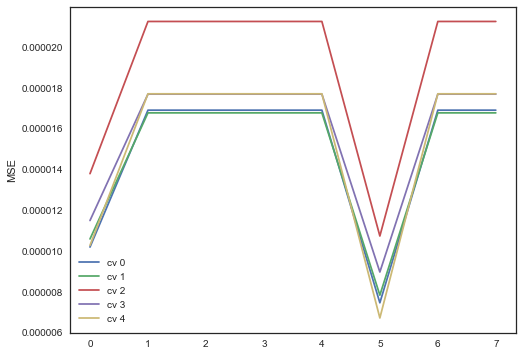

In [51]:
# A bit more involved approach: illustrated here with Lasso
# LASSO CROSS VAL
kf = KFold(len(X_trans),n_folds=5, shuffle=True)

all_scores=[]
alphas=[1e-5,1e-4,1e-3,1e-2,1e-1,0,1,100]


for train, test in kf:
    x_train=X_trans.iloc[train]
    y_train=y_trans.iloc[train]
    x_test=X_trans.iloc[test]
    y_test=y_trans.iloc[test]
    mse_score=[]
    r2=[]
    for a in alphas:
        est=Lasso(alpha=a,tol=0.001)
        est.fit(x_train,y_train)
        mse=np.mean((y_test-est.predict(x_test))**2)
        mse_score.append(mse)
        r2.append(est.score(x_test,y_test))
            
    all_scores.append(mse_score)
    
# Which alpha is the best for our model ? Looks like alpha= 0
plt.figure(figsize=(8,6))
#plt.ylim(0,0.1)
plt.legend()
for i in range(5):
    plt.plot(all_scores[i],label = 'cv %s'%i)
    
plt.legend()
plt.ylabel('MSE')
plt.show()

In [52]:
# Normalizing Data
scaler = StandardScaler()
scaler_trans = scaler.fit_transform(X)
x_scaler_df=pd.DataFrame(scaler_trans,columns=X.columns)

scalery_trans = scaler.fit_transform(y.reshape(-1, 1))
y_scaler_df=pd.DataFrame(scalery_trans,columns=["gd_rating_trans"])

In [53]:
####Grid Search to find best alpha using Lasso
score, alpha, intercept, features, pred = lassoCoef(x_scaler_df,y_scaler_df)
score, alpha, intercept, features

(0.50370322333922368,
 0.01,
 array([  3.91351108e-16]),
 [('gd_ceo_approval', 0.60343641575465445),
  ('gd_interview_pos_per', 0.15466466082666802),
  ('log_linkedin_followers', 0.13445307729802294),
  ('gd_interview_difficulty', 0.098158627926028474),
  ('mat_paid_weeks', 0.048005351022334795),
  ('co_age', 0.035992982791164238),
  ('revenue', -0.045363371828488736),
  ('log_employee_num', -0.13615096138301364)])

In [54]:
# Plotting Feature Importance
feature_df = pd.DataFrame(features, columns=['feature','abs_coefficient'])
feature_df.abs_coefficient = abs(feature_df.abs_coefficient)
feature_df.sort_values(by='abs_coefficient', ascending = False)

feature  abs_coefficient
0          gd_ceo_approval             0.60
1     gd_interview_pos_per             0.15
7         log_employee_num             0.14
2   log_linkedin_followers             0.13
3  gd_interview_difficulty             0.10
4           mat_paid_weeks             0.05
6                  revenue             0.05
5                   co_age             0.04

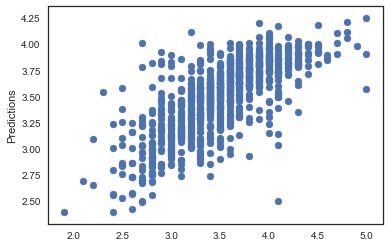

In [55]:
# company_data_clean['predictions'] = pred
plt.scatter(company_data_clean.gd_rating, scaler.inverse_transform(pred))
plt.ylabel('Predictions')
plt.show()

In [56]:
# # Take a quick look at our strongest features
# X_train, X_test, y_train, y_test = train_test_split(X_trans, y_trans, test_size=0.3)

# est=Lasso(alpha=0)
# est.fit(X_train,y_train)
# est.alpha


# zipped=zip(X.columns,est.coef_)
# features=sorted(zipped,key = lambda t: t[1],reverse=True)
# features

### Linear Regression Analysis: Tech Industry Focus

In [92]:
tech_data = company_data_clean[company_data_clean.industry_fin == "Technology"]
tech_data['rev_per_logemp'] = (tech_data.revenue / tech_data.log_employee_num)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              gd_rating   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     71.53
Date:                Fri, 26 Jan 2018   Prob (F-statistic):           2.92e-35
Time:                        11:26:00   Log-Likelihood:                -7.9208
No. Observations:                 133   AIC:                             27.84
Df Residuals:                     127   BIC:                             45.18
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.9682      0.292      3.318      0.001       0.391       1.546
mat_paid_weeks              0.0074      0.003      2.202      0.029       0.001       0.014
gd_ceo_approval             0.0214      0.002     14.187      0.000       0.018       0.024
gd_interview_pos_per        0.0045      0.002      2.350      0.020       0.001       0.008
gd_interview_difficulty     0.4997      0.091      5.511      0.000       0.320       0.679
log_employee_num           -0.1023      0.016     -6.253      0.000      -0.135      -0.070
==============================================================================
Omnibus:                       15.997   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.232
Skew:                          -0.702   Prob(JB):                     4.04e-05
Kurtosis:                       4.296   Cond. No.                     1.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

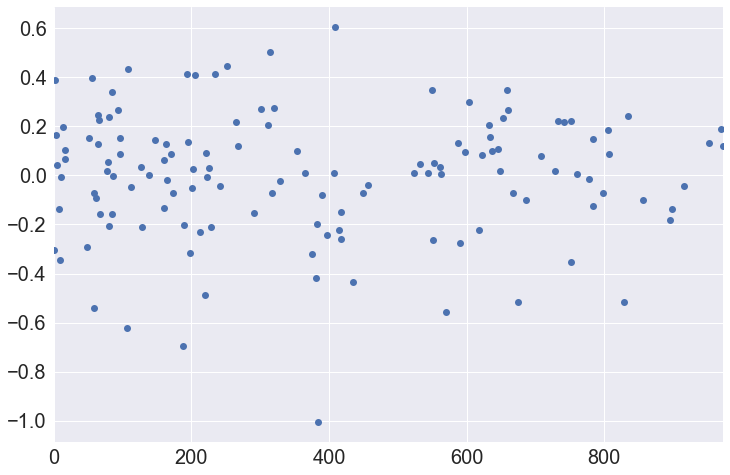

In [101]:
# Included everything at start, got rid of categoricals for industry since its only tech
# Got rid of company size categoricals due to insignificance and included employee number in its place
# Log transformed employee number and it drastically improved r-sq
# Got rid of age of company, revenue and linkedin followers since they were insignificant and decreased r-squared
pred_columns =  ['mat_paid_weeks', 'gd_ceo_approval',\
                'gd_interview_pos_per', 'gd_interview_difficulty',\
                'log_employee_num']
data_df, X, y, fit, fit_summary = sm_ols_reg('gd_rating', pred_columns, tech_data)
fit_summary

### Polynomial  for Tech Industry Regression

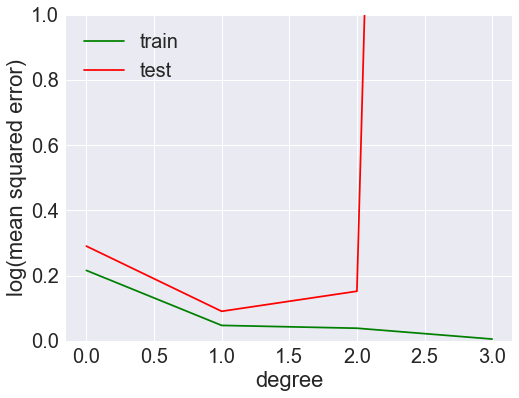

In [102]:
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# Step through degrees from 0 to 4 and store the training and test (generalization) error.
# create array of zeros,
train_error = np.empty(4)
test_error = np.empty(4)
for degree in range(4):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(X_train, y_train)
    train_error[degree] = mean_squared_error(y_train, est.predict(X_train))
    test_error[degree] = mean_squared_error(y_test, est.predict(X_test))

# Plot the training and test errors against degree
plt.figure(figsize=(8,6))
plt.plot(np.arange(4), train_error, color='green', label='train')
plt.plot(np.arange(4), test_error, color='red', label='test')
plt.ylim((0.0, 1e0))
plt.ylabel('log(mean squared error)')
plt.xlabel('degree')
plt.legend(loc='upper left')

In [103]:
# Fit for degree 2
degree = 2
est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
# Fitting model to training data
est.fit(X_train, y_train)
est.score(X, y)


0.61978766136442642

### Cross Validation For Tech Industry Regression

In [104]:
# KFOLDS ON LINEAR REG, TRAIN TEST SPLIT (DOES MODEL PERFORM THE SAME WAY)
lr = LinearRegression()
lr.fit(X,y)
#Calculating cross validated score across 5 folds
kf=KFold(n=len(X),n_folds=5,shuffle=True)

all_scores=[]

# get indices of corresponding train & test
for train,test in kf:
    x_train=X.iloc[train]
    y_train=y.iloc[train]
    x_test=X.iloc[test]
    y_test=y.iloc[test]
    all_scores.append(lr.score(x_test,y_test))
    
np.mean(all_scores)

0.72847509336791672

### Lasso Regularization For Tech Industry

In [105]:
scaler = StandardScaler()
scaler_trans = scaler.fit_transform(X)
x_scaler_df=pd.DataFrame(scaler_trans,columns=X.columns)

scalery_trans = scaler.fit_transform(y.reshape(-1, 1))
y_scaler_df=pd.DataFrame(scalery_trans,columns=["gd_rating_trans"])


In [106]:
X.describe()

mat_paid_weeks  gd_ceo_approval  gd_interview_pos_per  gd_interview_difficulty  log_employee_num
count          133.00           133.00                133.00                   133.00            133.00
mean             9.73            80.77                 58.04                     2.89              7.77
std              7.36            16.47                 14.18                     0.26              1.53
min              0.00            28.00                  7.00                     2.20              3.26
25%              6.00            69.00                 49.00                     2.70              6.62
50%              9.00            86.00                 59.00                     2.90              8.01
75%             12.00            95.00                 67.00                     3.00              9.21
max             52.00           100.00                100.00                     4.00              9.21

In [107]:
####Grid Search to find best alpha, intercept and features
score, alpha, intercept, features, pred = lassoCoef(x_scaler_df,y_scaler_df)
score, alpha, intercept, features

(0.6742972225815459,
 0.001,
 array([  2.55154493e-16]),
 [('gd_ceo_approval', 0.70093501550681059),
  ('gd_interview_difficulty', 0.26141977933120814),
  ('gd_interview_pos_per', 0.12595833300129206),
  ('mat_paid_weeks', 0.10663971101764864),
  ('log_employee_num', -0.30924637844474245)])

In [108]:
# Plotting Feature Importance
feature_df = pd.DataFrame(features, columns=['feature','abs_coefficient'])
feature_df.abs_coefficient = abs(feature_df.abs_coefficient)
feature_df.sort_values(by='abs_coefficient', ascending = False)

feature  abs_coefficient
0          gd_ceo_approval             0.70
4         log_employee_num             0.31
1  gd_interview_difficulty             0.26
2     gd_interview_pos_per             0.13
3           mat_paid_weeks             0.11

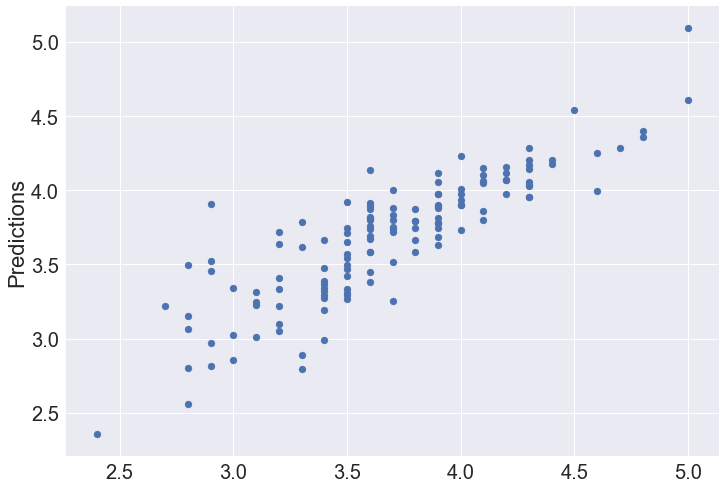

In [109]:
# company_data_clean['predictions'] = pred
plt.scatter(tech_data.gd_rating, scaler.inverse_transform(pred))
plt.ylabel('Predictions')
plt.show()

In [110]:
# first we normalize our features .. 
# normalize features to values between 0 and 1
data_df_trans=preprocessing.normalize(data_df,axis=0)

# turn back in DF
data_df_trans=pd.DataFrame(data_df_trans,columns=data_df.columns)

y_trans=data_df_trans['gd_rating']
X_trans=data_df_trans.drop('gd_rating',1)

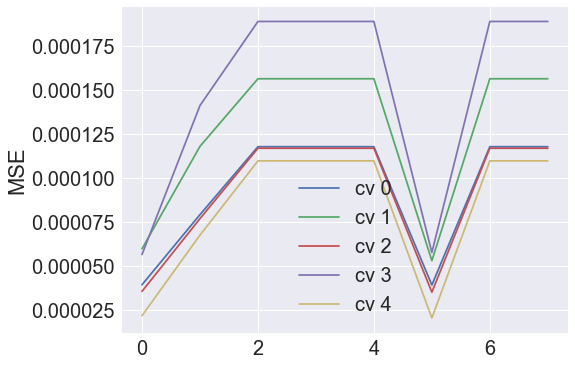

In [111]:
# A bit more involved approach: illustrated here with Lasso
# LASSO CROSS VAL
kf = KFold(len(X_trans),n_folds=5, shuffle=True)

all_scores=[]
alphas=[1e-5,1e-4,1e-3,1e-2,1e-1,0,1,100]


for train, test in kf:
    x_train=X_trans.iloc[train]
    y_train=y_trans.iloc[train]
    x_test=X_trans.iloc[test]
    y_test=y_trans.iloc[test]
    mse_score=[]
    r2=[]
    for a in alphas:
        est=Lasso(alpha=a,tol=0.001)
        est.fit(x_train,y_train)
        mse=np.mean((y_test-est.predict(x_test))**2)
        mse_score.append(mse)
        r2.append(est.score(x_test,y_test))
            
    all_scores.append(mse_score)
    
# Which alpha is the best for our model ? Looks like alpha= 0
plt.figure(figsize=(8,6))
#plt.ylim(0,0.1)
plt.legend()
for i in range(5):
    plt.plot(all_scores[i],label = 'cv %s'%i)
    
plt.legend()
plt.ylabel('MSE')
plt.show()

In [112]:
# # Take a quick look at our strongest features
# X_train, X_test, y_train, y_test = train_test_split(X_trans, y_trans, test_size=0.3)

# est=Lasso(alpha=0)
# est.fit(X_train,y_train)
# est.alpha


# zipped=zip(X.columns,est.coef_)
# features=sorted(zipped,key = lambda t: t[1],reverse=True)
# features

### Visualizations Of Dataset For Presentation


#### Word Cloud For Industries


In [113]:
industry_frequencies = company_data_clean.industry_fin.value_counts().reset_index()
industry_frequencies.head()

index  industry_fin
0            Technology           133
1            Healthcare            87
2               Finance            82
3  Educational Services            74
4                Retail            72

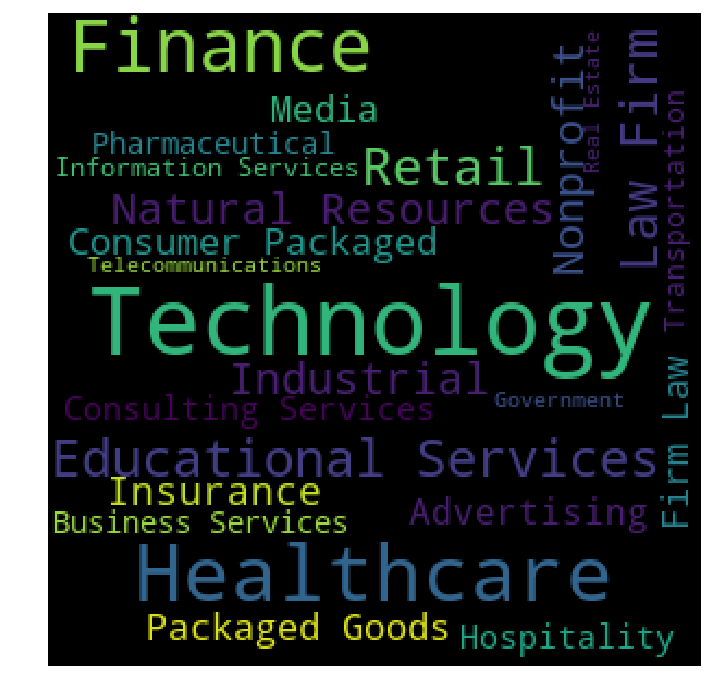

In [114]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 300, height = 300).generate(' '.join(company_data_clean.industry_fin))
# Generate plot
plt.figure(figsize=(20,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### Visualizing Maternity Leave & Glassdoor Ratings By Industry

In [72]:
li_followers_ind = company_data_clean.groupby(['industry_fin'])['lifollowers_per_emp'].agg(['mean', 'count']).reset_index()
li_followers_ind.columns = ['industry', 'avg_linkedin_followers', 'companies']
li_followers_ind.sort_values(by=['avg_linkedin_followers'], ascending=False)

industry  avg_linkedin_followers  companies
13                    Media                  366.10         33
17           Pharmaceutical                  179.63         21
0               Advertising                   67.50         28
15                Nonprofit                   56.11         46
20               Technology                   53.73        133
1         Business Services                   39.22         20
3   Consumer Packaged Goods                   35.39         31
4      Educational Services                   32.29         74
16                    Other                   29.48         54
14        Natural Resources                   28.12         43
2       Consulting Services                   27.96         23
9                Industrial                   25.66         45
6                Government                   23.78         11
21       Telecommunications                   18.29         10
10     Information Services                   17.41         16
5                   Finance                   16.91         82
19                   Retail                   16.24         72
8               Hospitality                   13.79         24
22           Transportation                   11.90         18
11                Insurance                   10.33         35
18              Real Estate                    9.81         10
7                Healthcare                    7.43         87
12                 Law Firm                    4.86         66

[Text(0,0.5,'Industry'), Text(0.5,0,'Average Linkedin Followers Per Employee')]

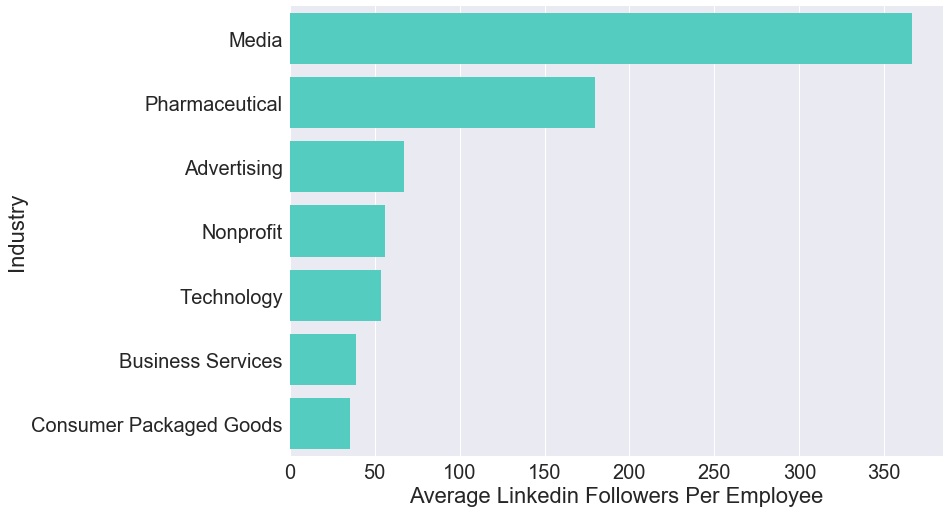

In [73]:
li_followers_ind_df = li_followers_ind.sort_values(by=['avg_linkedin_followers'], ascending=False)[0:7]

sns.set(rc={'figure.figsize':(11.7,8.27)},font_scale=2)
ax = sns.barplot(x="avg_linkedin_followers", y="industry", data=li_followers_ind_df, color="#40E0D0")
ax.set(xlabel='Average Linkedin Followers Per Employee', ylabel='Industry')


In [74]:
rating_industry = company_data_clean.groupby(['industry_fin'])['gd_rating'].agg(['mean', 'count']).reset_index()
rating_industry.columns = ['industry', 'avg_gd_rating', 'companies']
rating_industry.sort_values(by=['avg_gd_rating'], ascending=False)

industry  avg_gd_rating  companies
4      Educational Services           3.94         74
2       Consulting Services           3.78         23
10     Information Services           3.74         16
20               Technology           3.68        133
6                Government           3.60         11
5                   Finance           3.57         82
12                 Law Firm           3.54         66
3   Consumer Packaged Goods           3.49         31
18              Real Estate           3.49         10
0               Advertising           3.49         28
15                Nonprofit           3.49         46
9                Industrial           3.47         45
14        Natural Resources           3.45         43
22           Transportation           3.44         18
8               Hospitality           3.39         24
7                Healthcare           3.38         87
13                    Media           3.38         33
17           Pharmaceutical           3.37         21
11                Insurance           3.31         35
21       Telecommunications           3.27         10
16                    Other           3.25         54
1         Business Services           3.24         20
19                   Retail           3.19         72

(0, 5)

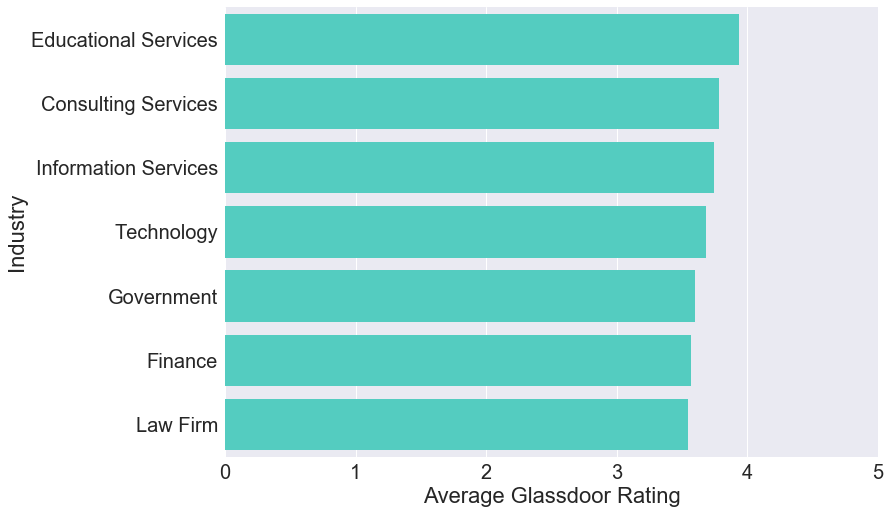

In [75]:
rating_industry_df = rating_industry.sort_values(by=['avg_gd_rating'], ascending=False)[0:7]

sns.set(rc={'figure.figsize':(11.7,8.27)},font_scale=2)
ax = sns.barplot(x="avg_gd_rating", y="industry", data=rating_industry_df, color="#40E0D0")
ax.set(xlabel='Average Glassdoor Rating', ylabel='Industry')
ax.set_xlim(0,5)

In [76]:
matleave_industry = company_data_clean.groupby(['industry_fin'])['mat_paid_weeks'].agg(['mean', 'count']).reset_index()
matleave_industry.columns = ['industry', 'avg_paid_maternity_leave', 'num_of_companies']
matleave_industry.sort_values(by=['avg_paid_maternity_leave'], ascending=False)

industry  avg_paid_maternity_leave  num_of_companies
12                 Law Firm                     15.24                66
20               Technology                      9.73               133
5                   Finance                      9.59                82
2       Consulting Services                      9.22                23
10     Information Services                      9.19                16
13                    Media                      7.97                33
0               Advertising                      7.54                28
3   Consumer Packaged Goods                      7.48                31
17           Pharmaceutical                      6.67                21
14        Natural Resources                      5.79                43
1         Business Services                      5.75                20
11                Insurance                      5.69                35
15                Nonprofit                      5.67                46
16                    Other                      5.26                54
21       Telecommunications                      5.10                10
6                Government                      5.09                11
19                   Retail                      4.57                72
4      Educational Services                      4.41                74
9                Industrial                      4.40                45
22           Transportation                      3.89                18
7                Healthcare                      3.46                87
18              Real Estate                      3.10                10
8               Hospitality                      2.62                24

[Text(0,0.5,'Industry'), Text(0.5,0,'Average Paid Maternity Leave (Weeks)')]

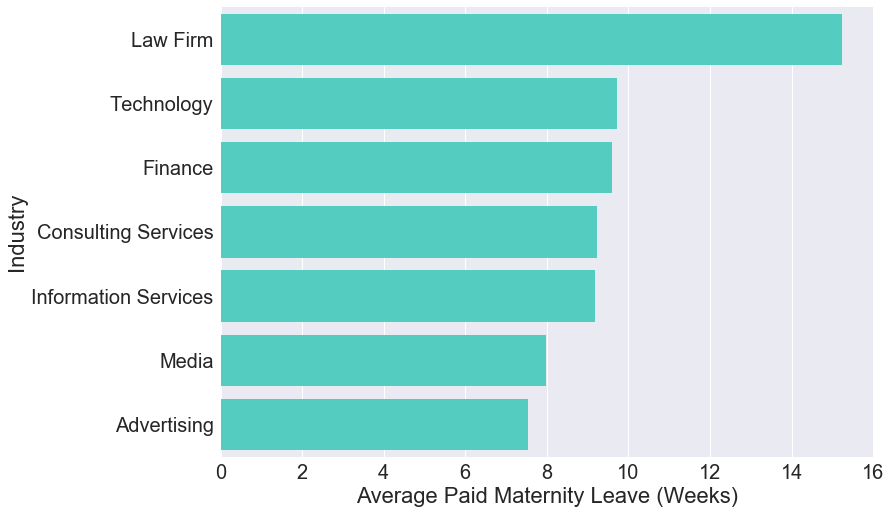

In [77]:
matleave_ind_box = matleave_industry.sort_values(by=['avg_paid_maternity_leave'], ascending=False)[0:7]

sns.set(rc={'figure.figsize':(11.7,8.27)},font_scale=2)
ax = sns.barplot(x="avg_paid_maternity_leave", y="industry", data=matleave_ind_box, color="#40E0D0")
ax.set(xlabel='Average Paid Maternity Leave (Weeks)', ylabel='Industry')


#### Visual With States 
Visualizing States by their average maternity leave

In [78]:
states_matleave = company_data_clean.groupby(['hq_state'])['mat_paid_weeks'].mean().reset_index()
states_matleave.columns = ['state', 'avg_paid_maternity_leave']
states_matleave.head()

state  avg_paid_maternity_leave
0    AL                      1.00
1    AR                      6.80
2    AZ                      7.50
3    CA                      8.95
4    CO                      5.71

In [79]:
state_list_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

states_df = pd.DataFrame(state_list_data.code)
states_df.columns = ['state']
# Merging full list of states with state list I got from groupby
states_with_mat_leave = states_df.merge(states_matleave, left_on='state', right_on='state', how='outer').sort_values(by=['state'])


In [80]:
# To map US states by paid maternity leave
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.offline as py

# Blue White Scale
scl = [[0, 'rgb(255, 255, 255)'],[.2, 'rgb(230, 230, 255)'],[.4, 'rgb(179, 179, 255)'],\
            [.6, 'rgb(128, 128, 255)'],[.8, 'rgb(51, 51, 255)'],[1, 'rgb(0,0,204)']]

# Rep/Dem Scale
# scl = [[0, 'rgb(255,0,0)'],[10.4, 'rgb(255,102,102)'],[20.8, 'rgb(255,204,204)'],\
#             [31.2, 'rgb(204,229,255)'],[41.6, 'rgb(102,178,255)'],[52, 'rgb(0,128,255)']]

# If you want detail text on hover
# df['text'] = df['state'] + '<br>' +\
#     'Beef '+df['beef']+' Dairy '+df['dairy']+'<br>'+\
#     'Fruits '+df['total fruits']+' Veggies ' + df['total veggies']+'<br>'+\
#     'Wheat '+df['wheat']+' Corn '+df['corn']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = states_with_mat_leave['state'],
        z = states_with_mat_leave['avg_paid_maternity_leave'].astype(float),
        locationmode = 'USA-states',
#       if you want hover details  
#       text = states,
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Paid Mat Leave (Weeks)"
        )
    ) ]

layout = dict(
        title = 'Average Paid Maternity Leave By State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = dict( data=data, layout=layout )
url = py.plot( fig, filename='d3-cloropleth-map' )